Best Random Forest Parameters: {'max_depth': 40}
Random Forest MAE: 9.615208877284596
Random Forest RMSE: 23.258114547349926
Random Forest MAE: 23.68718181818182
Random Forest RMSE: 45.74709919268603
Random Forest MAE: 30.73394495412844
Random Forest RMSE: 65.94840973661906


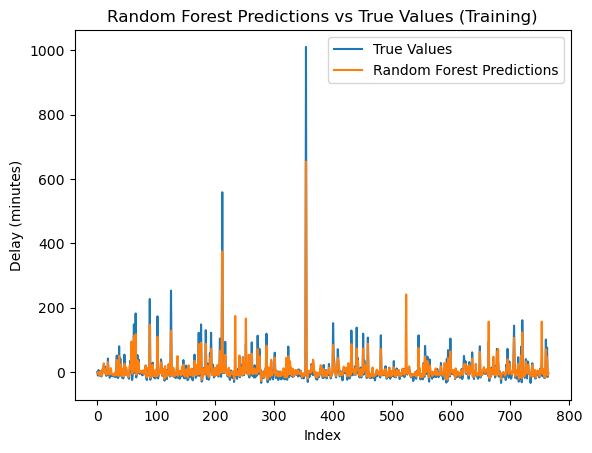

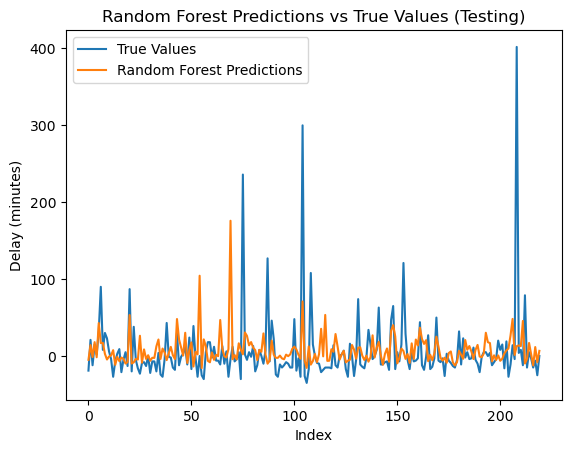

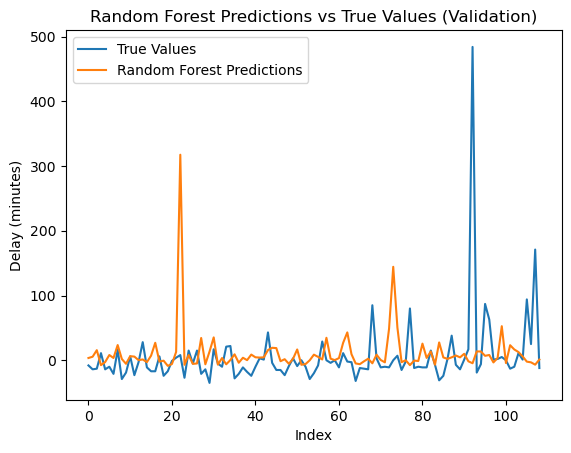

Random Forest Accuracy within 10 minutes (Training): 76.63%
Random Forest Accuracy within 10 minutes (Testing): 37.73%
Random Forest Accuracy within 10 minutes (Validation): 31.19%
Random Forest Accuracy within 15 minutes (Training): 85.77%
Random Forest Accuracy within 15 minutes (Testing): 52.27%
Random Forest Accuracy within 15 minutes (Validation): 46.79%
Random Forest Accuracy within 20 minutes (Training): 90.99%
Random Forest Accuracy within 20 minutes (Testing): 65.00%
Random Forest Accuracy within 20 minutes (Validation): 58.72%
Best KNN Parameters: {'n_neighbors': 7}
KNN MAE: 20.104625139873185
KNN RMSE: 47.03147722256063
KNN MAE: 23.523376623376624
KNN RMSE: 45.91257522735379
KNN MAE: 26.57142857142857
KNN RMSE: 57.38550382656709


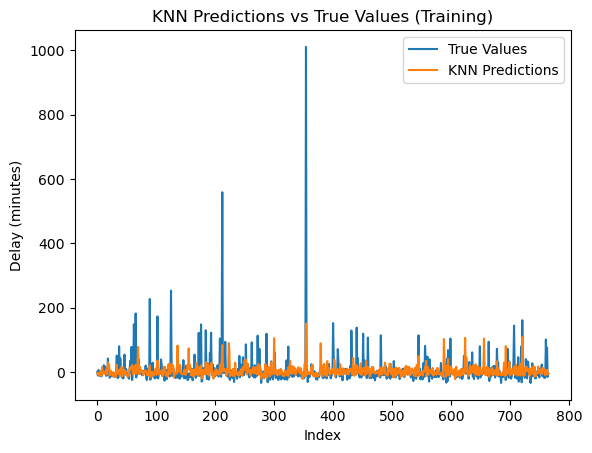

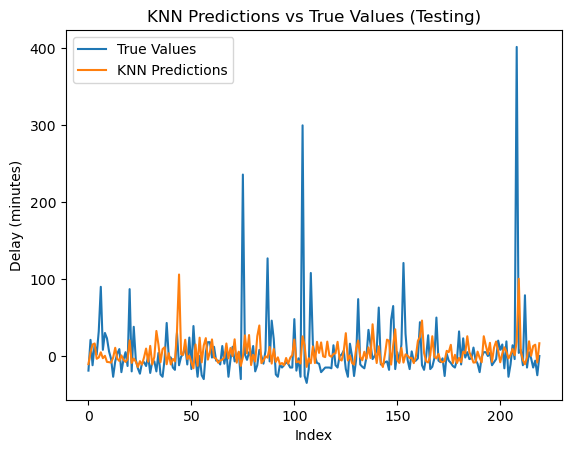

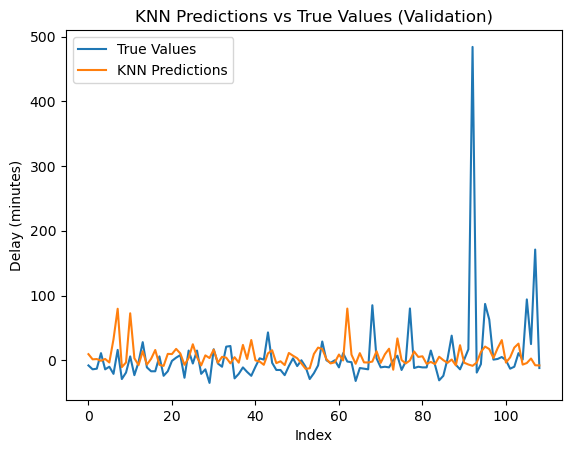

KNN Accuracy within 10 minutes (Training): 48.04%
KNN Accuracy within 10 minutes (Testing): 35.91%
KNN Accuracy within 10 minutes (Validation): 24.77%
KNN Accuracy within 15 minutes (Training): 63.84%
KNN Accuracy within 15 minutes (Testing): 52.27%
KNN Accuracy within 15 minutes (Validation): 42.20%
KNN Accuracy within 20 minutes (Training): 71.93%
KNN Accuracy within 20 minutes (Testing): 67.27%
KNN Accuracy within 20 minutes (Validation): 65.14%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

class DataHandler:
    def __init__(self, path):
        self.path = path
        self.data = pd.read_csv(path)
        self.data = self.data.fillna(0.0)
        self.feature_columns = ['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09',
                                'WSF2', 'WSF5', 'WDF2', 'WDF5', 'TMIN', 'TMAX', 'TAVG', 'PRCP', 'SNOW']
        self.target_column = 'ARR_DELAY'
        self.weather_features = None
        self.target_values = None

    def preprocess_data(self):
        self.data['PRCP'] = self.data['PRCP'].apply(self.__feature_encoder)
        self.data['SNOW'] = self.data['SNOW'].apply(self.__feature_encoder)
        self.weather_features = self.data[self.feature_columns].values
        self.target_values = self.data[self.target_column].values

    def __feature_encoder(self, value):
        return 1 if value > 0 else 0

class RandomForestModel:
    def __init__(self):
        self.model = RandomForestRegressor(random_state=1000)
        self.grid_search = None

    def tune_hyperparameters(self, train_x, train_y):
        parameters = {'max_depth': [10, 20, 30, 40, 50]}
        self.grid_search = GridSearchCV(self.model, parameters, scoring='neg_mean_squared_error', cv=5)
        self.grid_search.fit(train_x, train_y)
        self.model = self.grid_search.best_estimator_
        print("Best Random Forest Parameters:", self.grid_search.best_params_)

    def train(self, train_x, train_y):
        self.model.fit(train_x, train_y)

    def predict(self, test_x):
        return self.model.predict(test_x)

    def evaluate(self, true_values, predictions):
        mae = mean_absolute_error(true_values, predictions)
        rmse = mean_squared_error(true_values, predictions, squared=False)
        print("Random Forest MAE:", mae)
        print("Random Forest RMSE:", rmse)
        return mae, rmse

    def plot_predictions(self, true_values, predictions, dataset_name):
        plt.plot(true_values, label='True Values')
        plt.plot(predictions, label='Random Forest Predictions')
        plt.xlabel('Index')
        plt.ylabel('Delay (minutes)')
        plt.legend()
        plt.title(f'Random Forest Predictions vs True Values ({dataset_name})')
        plt.show()

    def calculate_accuracy(self, true_values, predictions, threshold):
        correct = sum(abs(predictions - true_values) <= threshold)
        accuracy = correct / len(true_values) * 100
        return accuracy

class KNNModel:
    def __init__(self):
        self.model = KNeighborsRegressor()
        self.grid_search = None

    def tune_hyperparameters(self, train_x, train_y):
        parameters = {'n_neighbors': [3, 5, 7, 9, 11]}
        self.grid_search = GridSearchCV(self.model, parameters, scoring='neg_mean_squared_error', cv=5)
        self.grid_search.fit(train_x, train_y)
        self.model = self.grid_search.best_estimator_
        print("Best KNN Parameters:", self.grid_search.best_params_)

    def train(self, train_x, train_y):
        self.model.fit(train_x, train_y)

    def predict(self, test_x):
        return self.model.predict(test_x)

    def evaluate(self, true_values, predictions):
        mae = mean_absolute_error(true_values, predictions)
        rmse = mean_squared_error(true_values, predictions, squared=False)
        print("KNN MAE:", mae)
        print("KNN RMSE:", rmse)
        return mae, rmse

    def plot_predictions(self, true_values, predictions, dataset_name):
        plt.plot(true_values, label='True Values')
        plt.plot(predictions, label='KNN Predictions')
        plt.xlabel('Index')
        plt.ylabel('Delay (minutes)')
        plt.legend()
        plt.title(f'KNN Predictions vs True Values ({dataset_name})')
        plt.show()

    def calculate_accuracy(self, true_values, predictions, threshold):
        correct = sum(abs(predictions - true_values) <= threshold)
        accuracy = correct / len(true_values) * 100
        return accuracy

def main():
    data_handler = DataHandler('AAS.csv')
    data_handler.preprocess_data()

    # Splitting the dataset into train, test, and validation sets
    train_x, temp_x, train_y, temp_y = train_test_split(data_handler.weather_features, data_handler.target_values, test_size=0.3, random_state=42)
    test_x, val_x, test_y, val_y = train_test_split(temp_x, temp_y, test_size=0.33, random_state=42)

    # Random Forest Model
    rf_model = RandomForestModel()
    rf_model.tune_hyperparameters(train_x, train_y)  # Perform hyperparameter tuning
    rf_model.train(train_x, train_y)
    rf_train_predictions = rf_model.predict(train_x)
    rf_test_predictions = rf_model.predict(test_x)
    rf_val_predictions = rf_model.predict(val_x)

    # Evaluation metrics
    rf_train_mae, rf_train_rmse = rf_model.evaluate(train_y, rf_train_predictions)
    rf_test_mae, rf_test_rmse = rf_model.evaluate(test_y, rf_test_predictions)
    rf_val_mae, rf_val_rmse = rf_model.evaluate(val_y, rf_val_predictions)

    # Plotting Random Forest predictions vs true values
    rf_model.plot_predictions(train_y, rf_train_predictions, "Training")
    rf_model.plot_predictions(test_y, rf_test_predictions, "Testing")
    rf_model.plot_predictions(val_y, rf_val_predictions, "Validation")

    # Calculating accuracy within 10/15/20 minutes delay
    thresholds = [10, 15, 20]
    for threshold in thresholds:
        rf_train_accuracy = rf_model.calculate_accuracy(train_y, rf_train_predictions, threshold)
        rf_test_accuracy = rf_model.calculate_accuracy(test_y, rf_test_predictions, threshold)
        rf_val_accuracy = rf_model.calculate_accuracy(val_y, rf_val_predictions, threshold)
        print(f"Random Forest Accuracy within {threshold} minutes (Training): {rf_train_accuracy:.2f}%")
        print(f"Random Forest Accuracy within {threshold} minutes (Testing): {rf_test_accuracy:.2f}%")
        print(f"Random Forest Accuracy within {threshold} minutes (Validation): {rf_val_accuracy:.2f}%")

    # KNN Model
    knn_model = KNNModel()
    knn_model.tune_hyperparameters(train_x, train_y)  # Perform hyperparameter tuning
    knn_model.train(train_x, train_y)
    knn_train_predictions = knn_model.predict(train_x)
    knn_test_predictions = knn_model.predict(test_x)
    knn_val_predictions = knn_model.predict(val_x)

    # Evaluation metrics
    knn_train_mae, knn_train_rmse = knn_model.evaluate(train_y, knn_train_predictions)
    knn_test_mae, knn_test_rmse = knn_model.evaluate(test_y, knn_test_predictions)
    knn_val_mae, knn_val_rmse = knn_model.evaluate(val_y, knn_val_predictions)

    # Plotting KNN predictions vs true values
    knn_model.plot_predictions(train_y, knn_train_predictions, "Training")
    knn_model.plot_predictions(test_y, knn_test_predictions, "Testing")
    knn_model.plot_predictions(val_y, knn_val_predictions, "Validation")

    # Calculating accuracy within 10/15/20 minutes delay
    for threshold in thresholds:
        knn_train_accuracy = knn_model.calculate_accuracy(train_y, knn_train_predictions, threshold)
        knn_test_accuracy = knn_model.calculate_accuracy(test_y, knn_test_predictions, threshold)
        knn_val_accuracy = knn_model.calculate_accuracy(val_y, knn_val_predictions, threshold)
        print(f"KNN Accuracy within {threshold} minutes (Training): {knn_train_accuracy:.2f}%")
        print(f"KNN Accuracy within {threshold} minutes (Testing): {knn_test_accuracy:.2f}%")
        print(f"KNN Accuracy within {threshold} minutes (Validation): {knn_val_accuracy:.2f}%")

if __name__ == "__main__":
    main()
